In [1]:
import numpy as np
import collections
import json

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib
import sys
import os
sys.path.append('../')
from utils import utils
from utils import mpl_stylesheet
from utils import read_tejaas_results
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 22, colors = 'banskt', dpi = 300)

In [9]:
infile = '../tissue_wide_transeqtls.txt'

nteqtls = dict()
with open(infile, 'r') as instream:
    for line in instream:
        linesplit = line.split()
        ntissue = int(linesplit[1].strip())
        nteqtls[ntissue] = int(linesplit[0].strip())

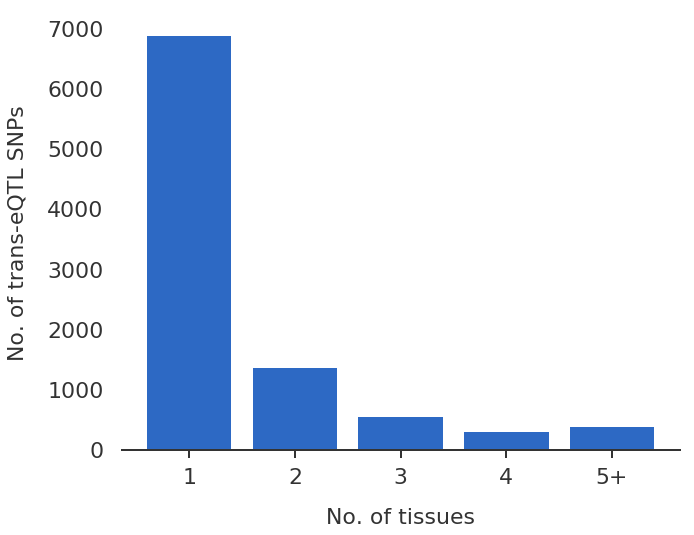

In [20]:
objects = list()
performance = list()
significance = list()

iend = 5

for i in range(iend):
    ntissue = i+1
    objects.append(f'{ntissue}')
    performance.append(nteqtls[ntissue])
    if ntissue == iend:
        performance[i] = sum([nteqtls[ntissue] for ntissue in range(iend, 22)])
        objects[i] = f'{iend}+'
    

fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(111)

x_pos = np.arange(len(objects))
bar1 = ax1.bar(x_pos, performance, align='center', linewidth = 0)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(objects)
ax1.set_ylabel('No. of trans-eQTL SNPs')
ax1.set_xlabel('No. of tissues')

ax1.tick_params(bottom = True, top = False, left = False, right = False, labelleft = True, labelbottom = True)
for side, border in ax1.spines.items():
    if not side == 'bottom':
        border.set_visible(False)

#fig.canvas.draw()
#xticklabels = [f'{x.get_position()[0] + 1 :3.1f}' for x in ax1.get_xticklabels()]
#ax1.set_xticklabels(xticklabels)

plt.savefig('../plots/number_comparison_tissue_overlap.png', bbox_inches='tight')
plt.show()